In [64]:
import pandas as pd

In [65]:
import numpy as np

In [66]:
import matplotlib.pyplot as plt

In [ ]:
df.to_csv('/content/drive/MyDrive/CASE_IFOOD/ViewingActivity.csv',encoding='utf-8-sig')
df

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,Mês,Dia,Hora,DiaSemana,Duration (min),Duration (hours),Duration (days),periodo,acessos


In [67]:
df = pd.read_csv('/content/drive/MyDrive/CASE_IFOOD/ViewingActivity_tocsv_transformado.csv')
df

,Unnamed: 0,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,0,Usuario 1,2021-01-04 17:40:58,00:01:01,NaN,Em Busca do Vale Encantado,NaN,Samsung Novatek DTV Smart TV,00:01:01,00:01:01,BR (Brazil)
1,1,Usuario 1,2021-01-04 17:32:40,00:06:04,NaN,Madagascar 2,NaN,Samsung Novatek DTV Smart TV,00:59:49,00:59:49,BR (Brazil)
2,2,Usuario 1,2021-01-04 14:19:55,00:18:59,Autoplayed: user action: Unspecified,A Estrela de Belem,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:18:59,00:18:59,BR (Brazil)
3,3,Usuario 1,2020-10-23 22:00:42,01:32:46,NaN,A Caminho da Lua,NaN,Samsung Novatek DTV Smart TV,01:30:01,01:30:01,BR (Brazil)
4,4,Usuario 1,2020-09-02 14:28:34,00:00:10,NaN,Amazonia,NaN,DefaultWidevineAndroidPhone,00:00:03,00:00:03,BR (Brazil)
...,...,...,...,...,...,...,...,...,...,...,...
13604,13604,Usuario 2,2015-08-02 01:42:27,00:00:16,NaN,Apenas Sexo,NaN,Mobile,00:29:10,00:29:10,BR (Brazil)
13605,13605,Usuario 2,2015-08-02 00:56:17,00:01:18,NaN,Secret Life of Babies,NaN,Mobile,00:03:50,00:03:50,BR (Brazil)
13606,13606,Usuario 2,2015-08-02 00:51:28,00:00:16,NaN,Apartment 23: Temporada 1: Piloto (Episodio 1),NaN,Mobile,00:06:00,00:06:00,BR (Brazil)
13607,13607,Usuario 2,2015-08-02 00:42:18,01:11:31,NaN,Ironias do amor,NaN,Samsung Novatek DTV Smart TV,01:14:14,Not latest view,BR (Brazil)


In [68]:
df.drop(columns='Unnamed: 0', inplace=True)

Usuário


In [ ]:
df = df[(df['Profile Name'] == 'Usuario 3')]

In [69]:
df.dropna(subset = ['Duration'], inplace=True) 

Apagando os videos do tipo trailer e teaser trailer para não enviesar os dados.

In [70]:
df.drop(df.loc[(df['Supplemental Video Type']=='TRAILER') | (df['Supplemental Video Type']=='TEASER_TRAILER')].index, inplace=True)

Apagando exibições curtas.

In [71]:
df.drop(df[df['Duration']<'00:03:00'].index, inplace=True)
df

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
1,Usuario 1,2021-01-04 17:32:40,00:06:04,NaN,Madagascar 2,NaN,Samsung Novatek DTV Smart TV,00:59:49,00:59:49,BR (Brazil)
2,Usuario 1,2021-01-04 14:19:55,00:18:59,Autoplayed: user action: Unspecified,A Estrela de Belem,NaN,AOC AOC 2016 MT5800 with no FRC Smart TV,00:18:59,00:18:59,BR (Brazil)
3,Usuario 1,2020-10-23 22:00:42,01:32:46,NaN,A Caminho da Lua,NaN,Samsung Novatek DTV Smart TV,01:30:01,01:30:01,BR (Brazil)
5,Usuario 1,2020-08-02 21:34:19,00:47:35,Autoplayed: user action: Unspecified,Super Monstros - Superamigos para Sempre,NaN,MStar PureTurnkey51 AOC OEM2K Smart TV,00:47:35,00:47:35,BR (Brazil)
7,Usuario 1,2020-08-02 21:07:33,00:22:26,NaN,Super Monstros: Turma Nova,NaN,MStar PureTurnkey51 AOC OEM2K Smart TV,00:22:26,00:22:26,BR (Brazil)
...,...,...,...,...,...,...,...,...,...,...
13597,Usuario 2,2015-08-02 02:38:09,00:11:59,NaN,Aprovados,NaN,Samsung Novatek DTV Smart TV,00:11:59,Not latest view,BR (Brazil)
13598,Usuario 2,2015-08-02 02:12:52,00:28:36,NaN,Ironias do amor,NaN,Mobile,01:35:23,Not latest view,BR (Brazil)
13599,Usuario 2,2015-08-02 02:03:02,00:18:09,NaN,Ironias do amor,NaN,Samsung Novatek DTV Smart TV,01:34:45,Not latest view,BR (Brazil)
13600,Usuario 2,2015-08-02 02:03:01,00:04:54,NaN,Ironias do amor,NaN,Mobile,01:06:50,Not latest view,BR (Brazil)


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8150 entries, 1 to 13607
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             8150 non-null   object
 1   Start Time               8150 non-null   object
 2   Duration                 8150 non-null   object
 3   Attributes               1979 non-null   object
 4   Title                    8150 non-null   object
 5   Supplemental Video Type  3 non-null      object
 6   Device Type              8150 non-null   object
 7   Bookmark                 8150 non-null   object
 8   Latest Bookmark          8150 non-null   object
 9   Country                  8150 non-null   object
dtypes: object(10)
memory usage: 700.4+ KB


In [73]:
df['Start Time'] = pd.to_datetime(df['Start Time'],utc=True)
df = df.set_index('Start Time')
df.index = df.index.tz_convert('America/Sao_Paulo')
df = df.reset_index()

In [74]:
df['Ano']= df['Start Time'].dt.year
df['Mês'] =df['Start Time'].dt.month
df['Dia'] = df['Start Time'].dt.day
df['Hora'] = df['Start Time'].dt.hour
df['DiaSemana'] = df['Start Time'].dt.day_name()

In [75]:
df['Hora'] = df["Hora"].astype(int)

In [76]:
df['Duration (min)'] = df['Duration'].str.split(':').apply(
    lambda x: float(x[0]) * 60.0 + float(x[1]) + float(x[2]) / 60.0)

df['Duration (hours)'] = df['Duration (min)']/60.0
df['Duration (days)'] = df['Duration (hours)']/24.0

In [77]:
DiaSemana = {	
    'Sunday':'Domingo',
		'Monday':'Segunda',
		'Tuesday':'Terça',
		'Wednesday':'Quarta',
		'Thursday':'Quinta',
		'Friday':'Sexta',
		'Saturday':'Sabado'		
}

df["DiaSemana"].replace(DiaSemana, inplace=True)

In [78]:
mes = {	
    1:'Janeiro',
		2:'Fevereiro',
		3:'Março',
		4:'Abril',
		5:'Maio',
		6:'Junho',
		7:'Julho',
		8:'Agosto',
		9:'Setembro',
		10:'Outubro',
		11:'Novembro',
		12:'Dezembro'		
}

df["Mês"].replace(mes, inplace=True)

In [79]:
def horario(x):
    if (x > 7) and (x <= 11):
        return 'Manhã'
    elif (x > 11) and (x <= 17 ):
        return 'Tarde'
    elif (x > 17) and (x <= 23):
        return 'Noite'
    elif (x >= 0) and (x <= 6) :
        return 'Madrugada'
    
df['periodo'] = df['Start Time'].dt.hour.apply(horario)

### Tipos de dispositivos

In [81]:
disp = df['Device Type'].value_counts()
disp

Samsung 2016 Jazz-L UHD TV Smart TV                               1491
Android DefaultWidevineL3Phone Android Phone (asus_ASUS_Z00UD)      84
Apple iPhone 7 (GSM)                                                83
LG 2018 Mstar LM18A STD UHD TV Smart TV                             32
Sony PS4                                                            32
DefaultWidevineAndroidPhone                                         31
Chrome PC (Cadmium)                                                 21
Samsung Novatek DTV Smart TV                                        11
Microsoft Xbox One S                                                 9
Netflix Windows App - Cadmium Windows Mobile                         4
Apple iPad Air 3rd Gen (Wi-Fi)                                       3
Android DefaultWidevineL3Phone Android Phone                         3
Samsung 2015 NT14M DTV Smart TV                                      2
Name: Device Type, dtype: int64

In [82]:
print(f'O total de acessos no período foi de {disp.sum()}.')


O total de acessos no período foi de 1806.


### Locais de acesso

In [83]:
pais = df['Country'].value_counts()
pais

BR (Brazil)     1771
IE (Ireland)      34
FR (France)        1
Name: Country, dtype: int64

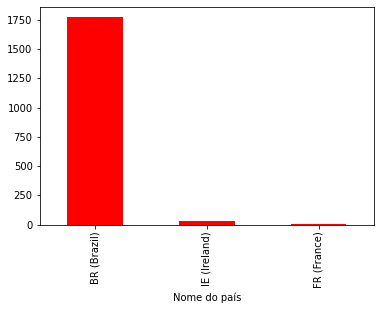

In [84]:
pais.sort_values(ascending=False).plot(kind='bar', color = 'r', xlabel = "Nome do país");

### Explorando os acessos.

In [85]:
meses = df['Mês'].value_counts()
meses

Agosto       294
Julho        244
Janeiro      176
Junho        161
Dezembro     154
Fevereiro    153
Setembro     126
Abril        113
Maio         104
Outubro      104
Novembro      97
Março         80
Name: Mês, dtype: int64

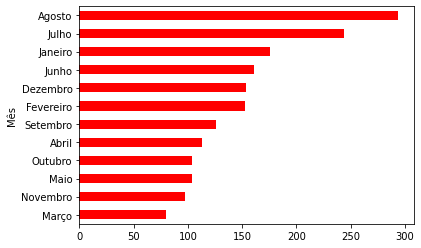

In [86]:
meses.sort_values().plot(kind='barh', color='r', xlabel = "Mês");

In [87]:
horario_fav = df['Hora'].value_counts()
horario_fav

14    250
13    214
15    185
17    158
16    133
22    118
21    114
18    108
12     98
23     79
19     71
20     69
11     60
10     41
0      41
1      21
9      20
7       9
2       9
3       4
6       2
8       1
4       1
Name: Hora, dtype: int64

In [88]:
periodo_fav = df['periodo'].value_counts()
periodo_fav

Tarde        1038
Noite         559
Manhã         122
Madrugada      78
Name: periodo, dtype: int64

In [89]:
dia_fav = df['DiaSemana'].value_counts()
dia_fav

Domingo    499
Sabado     393
Sexta      213
Terça      207
Quarta     175
Quinta     173
Segunda    146
Name: DiaSemana, dtype: int64

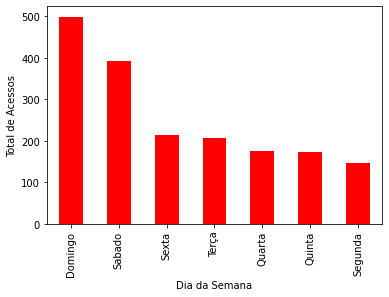

In [90]:
dia_fav.sort_values(ascending=False).plot(kind='bar', color = 'r', xlabel = "Dia da Semana", ylabel = "Total de Acessos");

### Tempo total

In [91]:
print(f'O tempo total em horas assistindo Netflix foi de {df["Duration (hours)"].sum()}.')

O tempo total em horas assistindo Netflix foi de 1296.766388888889.


In [92]:
minutos = df['Duration (min)'].sum()
horas = minutos/60
dias = horas/24
print(f'Tempo total assistido em dias: {int(dias)} dias {int(horas)-24*int(dias)} horas e {int(minutos)-60*(24*int(dias) + (int(horas)-24*int(dias)))} minutos.')
                              

Tempo total assistido em dias: 54 dias 0 horas e 45 minutos.


### Filmes/Séries mais assistidos

In [93]:
mais_vistas = df['Title'].value_counts()
mais_vistas.head(5)

Afonso Padilha - Isso tem que dar certo         6
Noite Adentro: Temporada 1: Rik (Episodio 5)    5
Copias - De Volta a  Vida                       5
Prenda-Me Se for Capaz                          5
Padrinhos Ltda.                                 5
Name: Title, dtype: int64

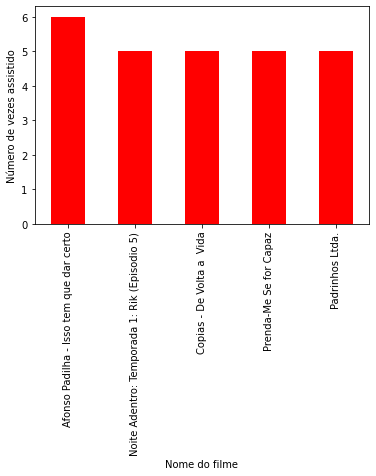

In [94]:
mais_vistas.sort_values(ascending=False).head(5).plot(kind='bar', color='r', xlabel = 'Nome do filme', ylabel='Número de vezes assistido');

In [104]:
series_por_hora = df.groupby(['Title'])['Duration (hours)'].sum().sort_values(ascending=False);
series_por_hora

Title
2012                                                      6.890000
Tropa de Elite                                            5.456667
Forrest Gump                                              4.997778
Invencivel                                                4.421389
Prenda-Me Se for Capaz                                    4.355833
                                                            ...   
The 100: Temporada 5: A batalha: Parte 2 (Episodio 13)    0.059444
Nosso Planeta: Temporada 1: Um so planeta (Episodio 1)    0.058889
Nada a Esconder                                           0.055000
Parte 3 (Resumo): La casa de papel                        0.053611
The Last Days on Mars                                     0.051111
Name: Duration (hours), Length: 1452, dtype: float64

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1806 entries, 381 to 2186
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype                            
---  ------                   --------------  -----                            
 0   Start Time               1806 non-null   datetime64[ns, America/Sao_Paulo]
 1   Profile Name             1806 non-null   object                           
 2   Duration                 1806 non-null   object                           
 3   Attributes               828 non-null    object                           
 4   Title                    1806 non-null   object                           
 5   Supplemental Video Type  2 non-null      object                           
 6   Device Type              1806 non-null   object                           
 7   Bookmark                 1806 non-null   object                           
 8   Latest Bookmark          1806 non-null   object                           
 9   Countr

In [97]:
df['Hora'] = pd.Categorical(df['Hora'], categories=
    [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
    ordered=True)

acessos_hora = df['Hora'].value_counts()
acessos_hora = acessos_hora.sort_index()

acessos_hora

0      41
1      21
2       9
3       4
4       1
5       0
6       2
7       9
8       1
9      20
10     41
11     60
12     98
13    214
14    250
15    185
16    133
17    158
18    108
19     71
20     69
21    114
22    118
23     79
Name: Hora, dtype: int64

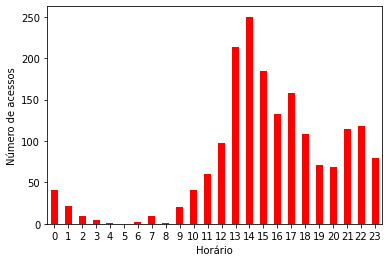

In [98]:
acessos_hora.plot(kind='bar', color = 'r', xlabel = "Horário", ylabel='Número de acessos', rot=0);

Analisando a duração dos filmes.

In [99]:
df["Duration (min)"].median()

41.375

In [100]:
df["Duration (min)"].max()

171.35

In [101]:
df[df["Duration (min)"]==171.35]

,Start Time,Profile Name,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country,Ano,Mês,Dia,Hora,DiaSemana,Duration (min),Duration (hours),Duration (days),periodo
1026,2019-01-29 20:40:05-02:00,Usuario 3,02:51:21,Autoplayed: user action: None,Pearl Harbor,NaN,Samsung 2016 Jazz-L UHD TV Smart TV,02:52:57,02:52:57,BR (Brazil),2019,Janeiro,29,20,Terça,171.35,2.855833,0.118993,Noite


In [102]:
#df.to_csv('/content/drive/MyDrive/CASE_IFOOD/Dados_Finais/ifood_case_netflix_total.csv')